# 📊 EDA et Fusion de Fichiers Météo
Ce notebook réalise une **analyse exploratoire des données (EDA)** sur trois fichiers météorologiques, les transforme et les fusionne dans un format commun.

## 🔧 Importation des bibliothèques nécessaires

In [104]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from timezonefinder import TimezoneFinder
import pytz
import os


## 📂 Chargement des fichiers CSV

In [105]:

fichier1 = pd.read_csv('data/processed/archive/meteo_global_2023-06-01_to_2025-07-05.csv')
fichier2 = pd.read_csv('data/processed/open_meteo/meteo_global.csv')
fichier3 = pd.read_csv('data/processed/open_weather/meteo_global.csv')


## 🔍 Analyse exploratoire des données (EDA)

In [106]:

# Informations de base sur les 3 fichiers
for i, df in enumerate([fichier1, fichier2, fichier3], start=1):
    print(f"=== FICHIER {i} ===")
    display(df.head())
    print(df.info())
    print(df.describe())
    print("Valeurs manquantes :\n", df.isna().sum(), "\n\n")


=== FICHIER 1 ===


,time,weather_code,temperature_2m_min,temperature_2m_max,wind_speed_10m_max,wind_gusts_10m_max,uv_index_max,precipitation_sum,precipitation_probability_max,temperature_2m_mean,...,dew_point_2m_max,dew_point_2m_min,relative_humidity_2m_max,relative_humidity_2m_min,relative_humidity_2m_mean,visibility_mean,visibility_min,visibility_max,wind_speed_10m_mean,city
0,2023-06-01,3.0,18.1,31.7,16.1,31.0,NaN,0.0,NaN,23.4,...,18.9,10.2,87.0,28.0,57.0,NaN,NaN,NaN,9.6,Toliara
1,2023-06-02,3.0,18.0,29.3,14.9,31.0,NaN,0.0,NaN,22.8,...,19.9,10.8,87.0,33.0,62.0,NaN,NaN,NaN,8.5,Toliara
2,2023-06-03,0.0,18.6,32.1,17.4,33.1,NaN,0.0,NaN,23.7,...,20.3,9.7,87.0,26.0,56.0,NaN,NaN,NaN,9.0,Toliara
3,2023-06-04,3.0,19.4,32.6,14.4,30.2,NaN,0.0,NaN,25.3,...,16.7,10.4,70.0,26.0,48.0,NaN,NaN,NaN,8.4,Toliara
4,2023-06-05,3.0,20.0,33.3,16.3,33.8,NaN,0.0,NaN,26.1,...,21.6,10.3,83.0,24.0,48.0,NaN,NaN,NaN,8.2,Toliara


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21448 entries, 0 to 21447
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   time                           21448 non-null  object 
 1   weather_code                   21412 non-null  float64
 2   temperature_2m_min             21412 non-null  float64
 3   temperature_2m_max             21412 non-null  float64
 4   wind_speed_10m_max             21412 non-null  float64
 5   wind_gusts_10m_max             21412 non-null  float64
 6   uv_index_max                   0 non-null      float64
 7   precipitation_sum              21384 non-null  float64
 8   precipitation_probability_max  0 non-null      float64
 9   temperature_2m_mean            21384 non-null  float64
 10  dew_point_2m_mean              21384 non-null  float64
 11  cloud_cover_mean               21384 non-null  float64
 12  cloud_cover_min                21412 non-null 

,time,interval,temperature_2m,apparent_temperature,relative_humidity_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,precipitation,rain,showers,snowfall,weather_code,cloud_cover,pressure_msl,surface_pressure,city
0,2025-06-25T11:30,900,31.6,36.6,53,9.0,293,22.3,0.0,0.0,0.0,0.0,0,13,1014.1,1010.2,Algiers
1,2025-06-25T13:30,900,21.3,19.4,46,13.6,102,34.9,0.0,0.0,0.0,0.0,3,82,1017.2,841.1,Nairobi
2,2025-06-25T13:30,900,19.2,16.6,58,19.5,109,30.2,0.0,0.0,0.0,0.0,3,84,1019.9,882.9,Antananarivo
3,2025-06-25T12:30,900,23.1,22.1,60,18.6,279,42.5,0.0,0.0,0.0,0.0,3,94,1010.2,1005.9,Berlin
4,2025-06-25T10:30,900,26.7,31.9,88,8.6,202,16.9,0.3,0.0,0.3,0.0,95,100,1014.6,1008.8,Abidjan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  338 non-null    object 
 1   interval              338 non-null    int64  
 2   temperature_2m        338 non-null    float64
 3   apparent_temperature  338 non-null    float64
 4   relative_humidity_2m  338 non-null    int64  
 5   wind_speed_10m        338 non-null    float64
 6   wind_direction_10m    338 non-null    int64  
 7   wind_gusts_10m        338 non-null    float64
 8   precipitation         338 non-null    float64
 9   rain                  338 non-null    float64
 10  showers               338 non-null    float64
 11  snowfall              338 non-null    float64
 12  weather_code          338 non-null    int64  
 13  cloud_cover           338 non-null    int64  
 14  pressure_msl          338 non-null    float64
 15  surface_pressure      3

,ville,pays,date_extraction,temperature,temperature_min,temperature_max,ressentie,humidite,pression_mer,pression_sol,visibilite,vent_vitesse,vent_direction,nuages,condition,description,heure_lever_soleil,heure_coucher_soleil,timezone
0,Amsterdam,NL,2025-06-29 00:01:57,20.18,19.36,20.50,20.42,83,1023,1023,10000,4.02,231,0,Clear,ciel dégagé,1751167279,1751227576,7200
1,Toamasina,MG,2025-06-29 00:02:27,20.00,20.00,20.00,20.67,100,1020,1019,10000,3.60,240,75,Clouds,nuageux,1751166860,1751206635,10800
2,Melbourne,US,2025-06-29 00:00:39,23.81,22.24,25.55,24.57,89,1018,1017,3306,5.36,196,65,Rain,pluie modérée,1751106503,1751156573,-14400
3,Moscou,RU,2025-06-29 00:01:26,15.15,14.24,15.19,14.37,63,1006,988,10000,1.66,80,97,Clouds,couvert,1751158091,1751221053,10800
4,Séoul,KR,2025-06-29 00:01:12,24.76,24.76,25.78,25.90,100,1008,999,10000,2.06,180,75,Clouds,nuageux,1751141603,1751194642,32400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ville                 325 non-null    object 
 1   pays                  325 non-null    object 
 2   date_extraction       325 non-null    object 
 3   temperature           325 non-null    float64
 4   temperature_min       325 non-null    float64
 5   temperature_max       325 non-null    float64
 6   ressentie             325 non-null    float64
 7   humidite              325 non-null    int64  
 8   pression_mer          325 non-null    int64  
 9   pression_sol          325 non-null    int64  
 10  visibilite            325 non-null    int64  
 11  vent_vitesse          325 non-null    float64
 12  vent_direction        325 non-null    int64  
 13  nuages                325 non-null    int64  
 14  condition             325 non-null    object 
 15  description           3

## 🔄 Transformation du **fichier 1** (archive) au format commun

In [107]:

fichier1_transformed = fichier1.rename(columns={
    'time': 'date',
    'temperature_2m_mean': 'temperature',
    'relative_humidity_2m_mean': 'humidity',
    'wind_speed_10m_mean': 'windSpeed',
    'precipitation_sum': 'precipitation',
    'visibility_mean': 'visibility',
    'weather_code': 'condition',
    'dew_point_2m_mean': 'dewPoint',
    'cloud_cover_mean': 'cloudCover'
})

# Ajout des colonnes manquantes
fichier1_transformed['pressure'] = None
fichier1_transformed['country'] = None

fichier1_transformed = fichier1_transformed[['date', 'city', 'temperature', 'humidity', 'pressure', 'windSpeed',
                                             'precipitation', 'visibility', 'condition',
                                             'dewPoint', 'cloudCover']]


## 🔄 Transformation du **fichier 2** (OpenMeteo) au format commun (agrégation horaire)

In [108]:

fichier2_grouped = fichier2.groupby(['time', 'city']).agg({
    'temperature_2m': 'mean',
    'relative_humidity_2m': 'mean',
    'wind_speed_10m': 'mean',
    'precipitation': 'sum',
    'cloud_cover': 'mean',
    'weather_code': lambda x: x.mode()[0] if not x.mode().empty else None,
    'pressure_msl': 'mean'
}).reset_index()

fichier2_transformed = fichier2_grouped.rename(columns={
    'time': 'date',
    'temperature_2m': 'temperature',
    'relative_humidity_2m': 'humidity',
    'wind_speed_10m': 'windSpeed',
    'precipitation': 'precipitation',
    'cloud_cover': 'cloudCover',
    'weather_code': 'condition',
    'pressure_msl': 'pressure'
})

# Ajout des colonnes manquantes
fichier2_transformed['visibility'] = None
fichier2_transformed['dewPoint'] = None
fichier2_transformed['country'] = None

fichier2_transformed = fichier2_transformed[['date', 'city', 'temperature', 'humidity', 'pressure', 'windSpeed',
                                             'precipitation', 'visibility', 'condition',
                                             'dewPoint', 'cloudCover']]


## 🔄 Transformation du **fichier 3** (OpenWeather) au format commun

In [109]:

fichier3_transformed = fichier3.rename(columns={
    'date_extraction': 'date',
    'ville': 'city',
    'pays': 'country',
    'temperature': 'temperature',
    'humidite': 'humidity',
    'pression_mer': 'pressure',
    'vent_vitesse': 'windSpeed',
    'nuages': 'cloudCover',
    'condition': 'condition',
    'visibilite': 'visibility',
})

# Ajout des colonnes manquantes
fichier3_transformed['precipitation'] = None
fichier3_transformed['dewPoint'] = None

fichier3_transformed = fichier3_transformed[['date', 'city', 'temperature', 'humidity', 'pressure', 'windSpeed',
                                             'precipitation', 'visibility', 'condition',
                                             'dewPoint', 'cloudCover']]


## 🔗 Fusion des 3 fichiers transformés

In [110]:

final_df = pd.concat([fichier1_transformed, fichier2_transformed, fichier3_transformed], ignore_index=True)
final_df = final_df.drop_duplicates(subset=['date', 'city'], keep='last')

# Importer le fichier contenant les pays pour chaque ville
cities_data = pd.read_csv("cities_data.csv")

# Ajouter le pays correspondant à chaque ville en fusionnant les données
final_df = pd.merge(final_df, cities_data[["city", "country"]], how="left", on="city")

display(final_df.head())


/tmp/ipykernel_165383/3423727381.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([fichier1_transformed, fichier2_transformed, fichier3_transformed], ignore_index=True)


,date,city,temperature,humidity,pressure,windSpeed,precipitation,visibility,condition,dewPoint,cloudCover,country
0,2023-06-01,Toliara,23.4,57.0,NaN,9.6,0.0,NaN,3.0,13.5,78.0,Madagascar
1,2023-06-02,Toliara,22.8,62.0,NaN,8.5,0.0,NaN,3.0,14.4,31.0,Madagascar
2,2023-06-03,Toliara,23.7,56.0,NaN,9.0,0.0,NaN,0.0,13.5,0.0,Madagascar
3,2023-06-04,Toliara,25.3,48.0,NaN,8.4,0.0,NaN,3.0,12.5,43.0,Madagascar
4,2023-06-05,Toliara,26.1,48.0,NaN,8.2,0.0,NaN,3.0,13.2,18.0,Madagascar


## 🔄 Transformation du **Codition** au format label

In [111]:
weather_mapping = {
    0: "Clear",
    1: "Clear",
    2: "Clouds",
    3: "Overcast",
    45: "Fog",
    48: "Fog",
    51: "Drizzle",
    53: "Drizzle",
    55: "Drizzle",
    56: "Drizzle",
    57: "Drizzle",
    61: "Rain",
    63: "Rain",
    65: "Rain",
    66: "Rain",
    67: "Rain",
    71: "Snow",
    73: "Snow",
    75: "Snow",
    77: "Snow",
    80: "Rain",
    81: "Rain",
    82: "Rain",
    85: "Snow",
    86: "Snow",
    95: "Thunderstorm",
    96: "Thunderstorm",
    99: "Thunderstorml",
    "Clear": "Clear",
    "Clouds": "Clouds",
    "Rain": "Rain",
    "Thunderstorm": "Thunderstorm",
    "Drizzle": "Drizzle",
    "Mist": "Fog",
    "Haze": "Fog",
    "Fog": "Fog",
    "Dust": "Fog",
}
final_df["condition"] = final_df["condition"].map(weather_mapping)
display(final_df.head())


,date,city,temperature,humidity,pressure,windSpeed,precipitation,visibility,condition,dewPoint,cloudCover,country
0,2023-06-01,Toliara,23.4,57.0,NaN,9.6,0.0,NaN,Overcast,13.5,78.0,Madagascar
1,2023-06-02,Toliara,22.8,62.0,NaN,8.5,0.0,NaN,Overcast,14.4,31.0,Madagascar
2,2023-06-03,Toliara,23.7,56.0,NaN,9.0,0.0,NaN,Clear,13.5,0.0,Madagascar
3,2023-06-04,Toliara,25.3,48.0,NaN,8.4,0.0,NaN,Overcast,12.5,43.0,Madagascar
4,2023-06-05,Toliara,26.1,48.0,NaN,8.2,0.0,NaN,Overcast,13.2,18.0,Madagascar


## 💫 remplacer les valeurs NaN d’une colonne par la moyenne des valeurs non NaN sur les valeurs numeriques

In [112]:

# Sélectionne les colonnes numériques
numeric_cols = final_df.select_dtypes(include=["number"]).columns

# Pour chaque colonne numérique, appliquer la moyenne par ville
for col in numeric_cols:
    final_df[col] = final_df.groupby("city")[col].transform(lambda x: x.fillna(x.mean()))

# Convertir en entier (supprimer les décimales)
final_df["pressure"] = final_df["pressure"].astype(int)

final_df = final_df.fillna(0)

display(final_df.head())


/tmp/ipykernel_165383/1972020842.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.fillna(0)


,date,city,temperature,humidity,pressure,windSpeed,precipitation,visibility,condition,dewPoint,cloudCover,country
0,2023-06-01,Toliara,23.4,57.0,1020,9.6,0.0,0,Overcast,13.5,78.0,Madagascar
1,2023-06-02,Toliara,22.8,62.0,1020,8.5,0.0,0,Overcast,14.4,31.0,Madagascar
2,2023-06-03,Toliara,23.7,56.0,1020,9.0,0.0,0,Clear,13.5,0.0,Madagascar
3,2023-06-04,Toliara,25.3,48.0,1020,8.4,0.0,0,Overcast,12.5,43.0,Madagascar
4,2023-06-05,Toliara,26.1,48.0,1020,8.2,0.0,0,Overcast,13.2,18.0,Madagascar


## 🕗 Ajouter la colonne timezone

In [113]:

# Charger le fichier cities_data
cities_data = pd.read_csv('cities_data.csv')

# Initialiser TimezoneFinder
tf = TimezoneFinder()

# Calculer le timezone pour chaque ville
def find_timezone(row):
    try:
        return tf.timezone_at(lng=row['longitude'], lat=row['latitude'])
    except:
        return None

cities_data['timezone'] = cities_data.apply(find_timezone, axis=1)

# Vérifier le résultat
print(cities_data[['city', 'country', 'timezone']].head())


          city country             timezone
0        Tokyo   Japan           Asia/Tokyo
1     Shanghai   China        Asia/Shanghai
2    Sao Paulo  Brazil    America/Sao_Paulo
3  Mexico City  Mexico  America/Mexico_City
4       Mumbai   India         Asia/Kolkata


## 💥 Ajouter le timezone aux données météo

In [114]:
final_df = pd.merge(final_df, cities_data[['city', 'country', 'timezone']], on=['city', 'country'], how='left')
display(final_df.head())


,date,city,temperature,humidity,pressure,windSpeed,precipitation,visibility,condition,dewPoint,cloudCover,country,timezone
0,2023-06-01,Toliara,23.4,57.0,1020,9.6,0.0,0,Overcast,13.5,78.0,Madagascar,Indian/Antananarivo
1,2023-06-02,Toliara,22.8,62.0,1020,8.5,0.0,0,Overcast,14.4,31.0,Madagascar,Indian/Antananarivo
2,2023-06-03,Toliara,23.7,56.0,1020,9.0,0.0,0,Clear,13.5,0.0,Madagascar,Indian/Antananarivo
3,2023-06-04,Toliara,25.3,48.0,1020,8.4,0.0,0,Overcast,12.5,43.0,Madagascar,Indian/Antananarivo
4,2023-06-05,Toliara,26.1,48.0,1020,8.2,0.0,0,Overcast,13.2,18.0,Madagascar,Indian/Antananarivo


## 💡 Supprimer les lignes contenant des valeurs NaN dans la colonne **timezone**

In [115]:
final_df = final_df.dropna(subset=["timezone"])
display(final_df.head())

,date,city,temperature,humidity,pressure,windSpeed,precipitation,visibility,condition,dewPoint,cloudCover,country,timezone
0,2023-06-01,Toliara,23.4,57.0,1020,9.6,0.0,0,Overcast,13.5,78.0,Madagascar,Indian/Antananarivo
1,2023-06-02,Toliara,22.8,62.0,1020,8.5,0.0,0,Overcast,14.4,31.0,Madagascar,Indian/Antananarivo
2,2023-06-03,Toliara,23.7,56.0,1020,9.0,0.0,0,Clear,13.5,0.0,Madagascar,Indian/Antananarivo
3,2023-06-04,Toliara,25.3,48.0,1020,8.4,0.0,0,Overcast,12.5,43.0,Madagascar,Indian/Antananarivo
4,2023-06-05,Toliara,26.1,48.0,1020,8.2,0.0,0,Overcast,13.2,18.0,Madagascar,Indian/Antananarivo


## 💾 Sauvegarde du fichier final

In [116]:

final_df.to_csv('meteo_data_final.csv', index=False)
print("✅ Fichier fusionné créé : meteo_data_final.csv")


✅ Fichier fusionné créé : meteo_data_final.csv


## 📈 Visualisations simples

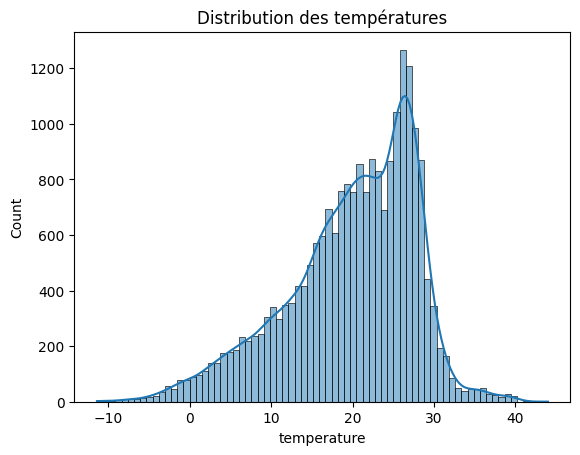

Valeurs manquantes dans le fichier final :
date             0
city             0
temperature      0
humidity         0
pressure         0
windSpeed        0
precipitation    0
visibility       0
condition        0
dewPoint         0
cloudCover       0
country          0
timezone         0
dtype: int64


In [117]:

sns.histplot(final_df['temperature'].dropna(), kde=True)
plt.title('Distribution des températures')
plt.show()

print("Valeurs manquantes dans le fichier final :")
print(final_df.isna().sum())


## ✅ Script complet de transformation


In [118]:

input_file = "meteo_data_final.csv"
output_dir = "data/star_schema"
os.makedirs(output_dir, exist_ok=True)

# Chargement des données
meteo_data = pd.read_csv(input_file)

# -----------------------
# Dimension Pays
# -----------------------
dim_country_path = f"{output_dir}/dim_country.csv"
dim_country = pd.read_csv(dim_country_path) if os.path.exists(dim_country_path) else pd.DataFrame(columns=['country_id', 'country'])

new_countries = set(meteo_data['country']) - set(dim_country['country'])
if new_countries:
    next_id = dim_country['country_id'].max() + 1 if not dim_country.empty else 1
    new_rows = pd.DataFrame({'country_id': range(next_id, next_id + len(new_countries)), 'country': list(new_countries)})
    dim_country = pd.concat([dim_country, new_rows], ignore_index=True)
    dim_country.to_csv(dim_country_path, index=False)

meteo_data = meteo_data.merge(dim_country, on='country', how='left')

# -----------------------
# Dimension Ville
# -----------------------
dim_city_path = f"{output_dir}/dim_city.csv"
dim_city = pd.read_csv(dim_city_path) if os.path.exists(dim_city_path) else pd.DataFrame(columns=['city_id', 'city', 'country_id', 'timezone'])

new_cities = {
    (row['city'], row['country_id'], row['timezone'])
    for _, row in meteo_data.iterrows()
    if (row['city'], row['country_id'], row['timezone']) not in set(zip(dim_city['city'], dim_city['country_id'], dim_city['timezone']))
}

if new_cities:
    next_id = dim_city['city_id'].max() + 1 if not dim_city.empty else 1
    new_rows = pd.DataFrame({
        'city_id': range(next_id, next_id + len(new_cities)),
        'city': [v[0] for v in new_cities],
        'country_id': [v[1] for v in new_cities],
        'timezone': [v[2] for v in new_cities]
    })
    dim_city = pd.concat([dim_city, new_rows], ignore_index=True)
    dim_city.to_csv(dim_city_path, index=False)

# -----------------------
# Dimension Condition météo
# -----------------------
dim_condition_path = f"{output_dir}/dim_condition.csv"
dim_condition = pd.read_csv(dim_condition_path) if os.path.exists(dim_condition_path) else pd.DataFrame(columns=['condition_id', 'condition'])

new_conditions = set(meteo_data['condition']) - set(dim_condition['condition'])
if new_conditions:
    next_id = dim_condition['condition_id'].max() + 1 if not dim_condition.empty else 1
    new_rows = pd.DataFrame({'condition_id': range(next_id, next_id + len(new_conditions)), 'condition': list(new_conditions)})
    dim_condition = pd.concat([dim_condition, new_rows], ignore_index=True)
    dim_condition.to_csv(dim_condition_path, index=False)

# -----------------------
# Dimension Temps
# -----------------------
dim_time_path = f"{output_dir}/dim_time.csv"
dim_time = pd.read_csv(dim_time_path) if os.path.exists(dim_time_path) else pd.DataFrame(columns=['time_id', 'date'])

new_dates = set(meteo_data['date']) - set(dim_time['date'])
if new_dates:
    next_id = dim_time['time_id'].max() + 1 if not dim_time.empty else 1
    new_rows = pd.DataFrame({'time_id': range(next_id, next_id + len(new_dates)), 'date': list(new_dates)})
    dim_time = pd.concat([dim_time, new_rows], ignore_index=True)
    dim_time.to_csv(dim_time_path, index=False)

# -----------------------
# Construction de la table de faits
# -----------------------
fact_weather = meteo_data \
    .merge(dim_city, on=['city', 'country_id', 'timezone'], how='left') \
    .merge(dim_condition, on='condition', how='left') \
    .merge(dim_time, on='date', how='left')

fact_weather = fact_weather[[
    'time_id', 'city_id', 'condition_id',
    'temperature', 'humidity', 'pressure', 'windSpeed',
    'precipitation', 'visibility', 'dewPoint', 'cloudCover'
]]

# -----------------------
# Sauvegarde
# -----------------------
fact_path = f"{output_dir}/fact_weather.csv"
fact_weather.to_csv(fact_path, index=False)

print("✅ Transformation terminée.")


✅ Transformation terminée.
